### Exploratory Data Analysis on 'Global Terrorism'

Dataset: https://bit.ly/2TK5Xn5

####  Created by Reshmika Dhandapani

### Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Read the file

In [2]:
df = pd.read_csv('globalterrorism.csv',encoding='latin1')
df.head()

C:\ANACONDA\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


### Gettting some insights from the data

In [3]:
df.shape

(181691, 135)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [5]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

#### Since the dataframe contains 135 columns. There is a huge number of irrelevant data in dataset and not all of them are necessary. So we will only extract the necessary columns.

In [6]:
df=df[['iyear','imonth','iday','country_txt','provstate',
       'region_txt','attacktype1_txt','target1','nkill',
       'nwound','summary','gname','targtype1_txt','weaptype1_txt','motive']]

In [7]:
df.head()

,iyear,imonth,iday,country_txt,provstate,region_txt,attacktype1_txt,target1,nkill,nwound,summary,gname,targtype1_txt,weaptype1_txt,motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Assassination,Julio Guzman,1.0,0.0,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Hostage Taking (Kidnapping),"Nadine Chaval, daughter",0.0,0.0,NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Assassination,Employee,1.0,0.0,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Bombing/Explosion,U.S. Embassy,NaN,NaN,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Facility/Infrastructure Attack,U.S. Consulate,NaN,NaN,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [8]:
df.describe()

,iyear,imonth,iday,nkill,nwound
count,181691.000000,181691.000000,181691.000000,171378.000000,165380.000000
mean,2002.638997,6.467277,15.505644,2.403272,3.167668
std,13.259430,3.388303,8.814045,11.545741,35.949392
min,1970.000000,0.000000,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,2.000000,2.000000
max,2017.000000,12.000000,31.000000,1570.000000,8191.000000


In [9]:
#checking for missing values
df.isnull().sum()

iyear                   0
imonth                  0
iday                    0
country_txt             0
provstate             421
region_txt              0
attacktype1_txt         0
target1               636
nkill               10313
nwound              16311
summary             66129
gname                   0
targtype1_txt           0
weaptype1_txt           0
motive             131130
dtype: int64

### Data Visualisation

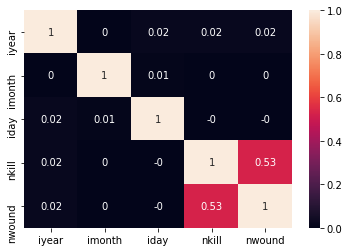

In [10]:
sns.heatmap(np.round(df.corr(),2),annot=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000211D1892588>,
      dtype=object)

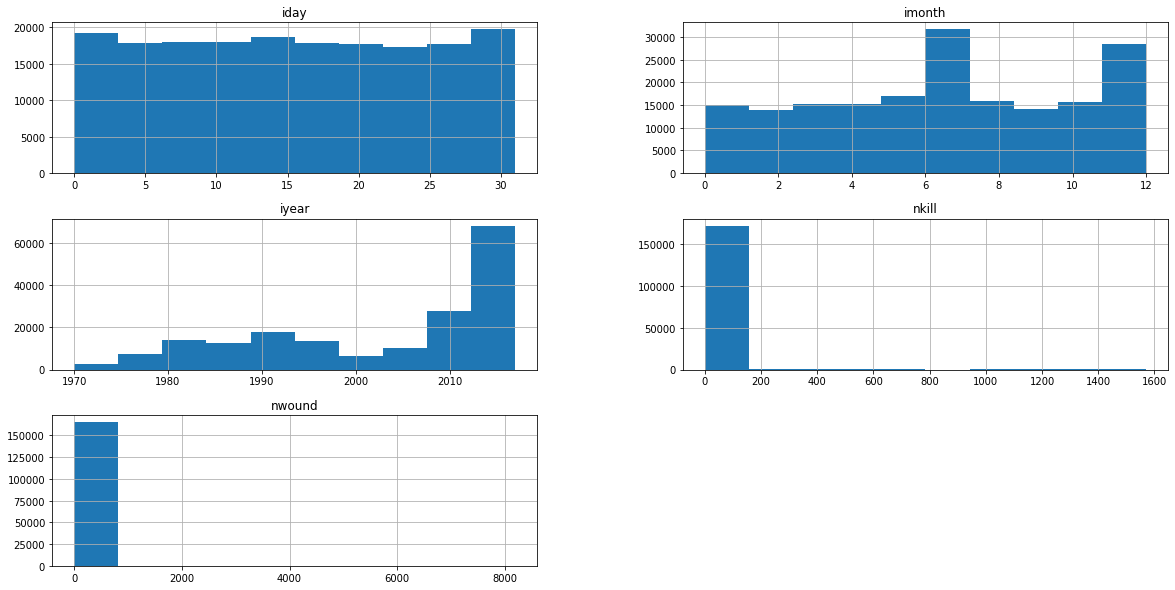

In [11]:
df.hist(figsize=(20,10)) 

### Countries affected with maximum number of attacks

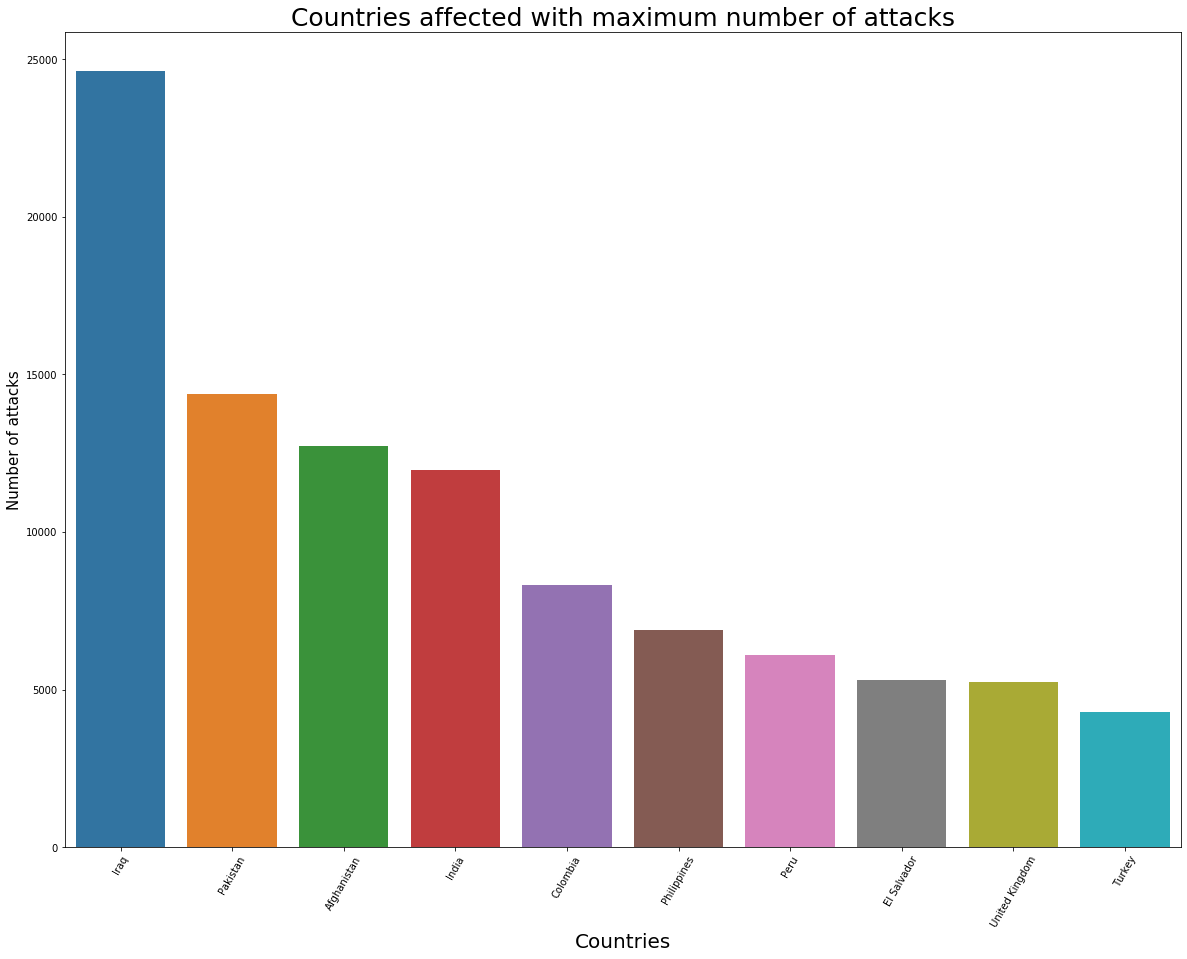

In [12]:
plt.subplots(figsize = (20,15))
sns.barplot(df['country_txt'].value_counts()[:10].index,df['country_txt'].value_counts()[:10].values)
plt.title('Countries affected with maximum number of attacks',fontsize = 25)
plt.xlabel('Countries',fontsize=20)
plt.ylabel('Number of attacks', fontsize =15)
plt.xticks(rotation = 60)
plt.show()

### Count of Attacks Region wise

Text(0.5, 1.0, 'Most Attacked Cities')

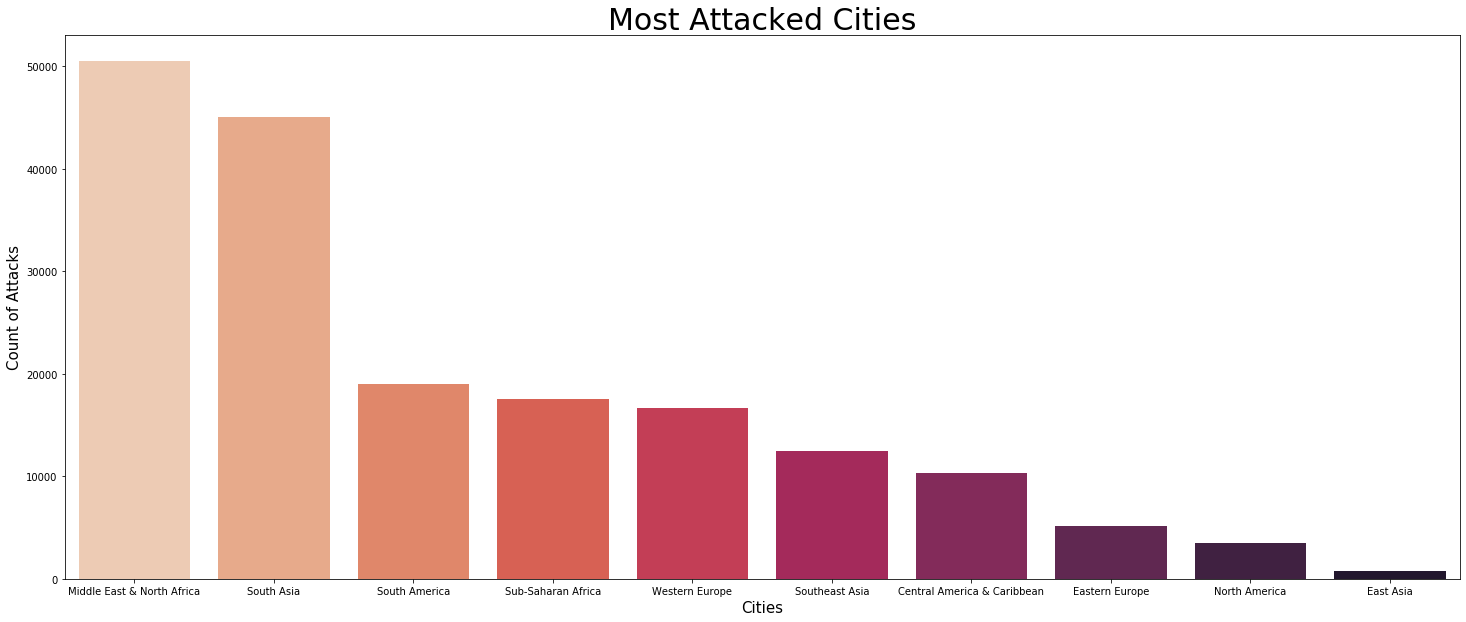

In [13]:
Count_of_attacks = df['region_txt'].value_counts().values[:10]
City = df['region_txt'].value_counts().index[:10]

fig,ax = plt.subplots(figsize=(25, 10))
sns.barplot(x=City, y=Count_of_attacks, palette="rocket_r")
ax.set_ylabel(ylabel = 'Count of Attacks', fontsize = 15)
ax.set_xlabel(xlabel = 'Cities', fontsize = 15)
ax.set_title('Most Attacked Cities',fontsize=30)

### Terrorist Activities by Region in each Year through Area Plot

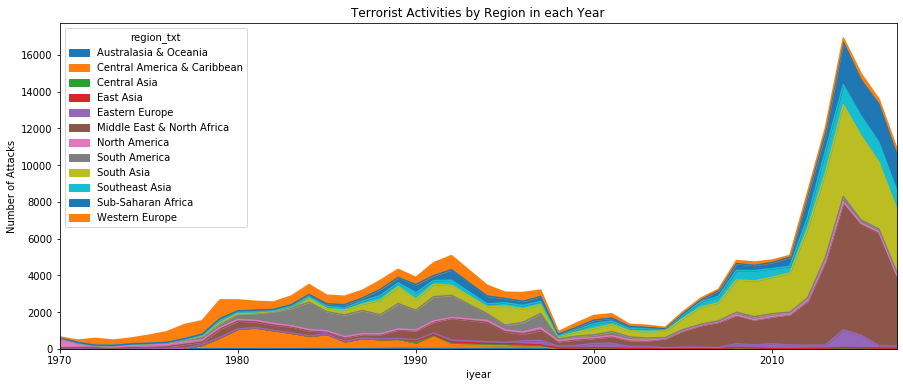

In [14]:
pd.crosstab(df.iyear, df.region_txt	).plot(kind='area',figsize=(15,6))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

### Number of Terrorist Activities each Year

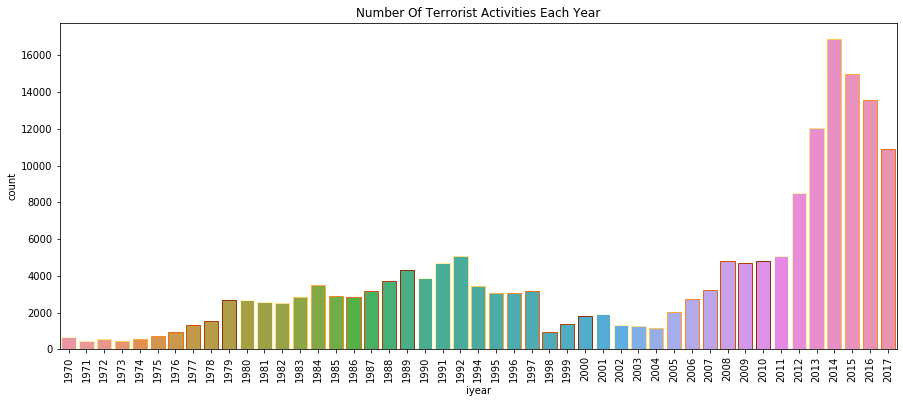

In [15]:
plt.subplots(figsize=(15,6))
sns.countplot('iyear',data=df,edgecolor=sns.color_palette("YlOrBr", 10))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

### Method of Attack

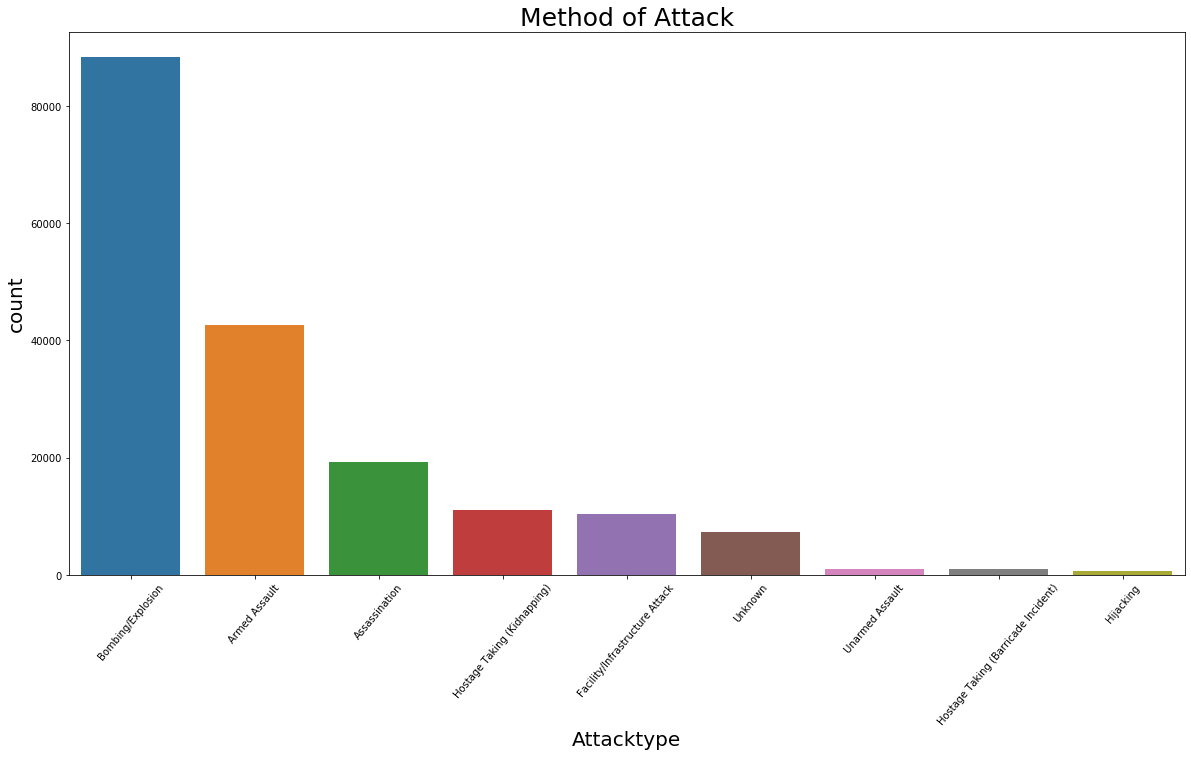

In [16]:
plt.subplots(figsize=(20,10))
sns.countplot(df["attacktype1_txt"],order=df['attacktype1_txt'].value_counts().index)
plt.xticks(rotation=50,fontsize =10)
plt.xlabel("Attacktype",fontsize=20)
plt.ylabel("count",fontsize=20)
plt.title("Method of Attack",fontsize=25)
plt.show()

### Top 10 Terrorist group attack

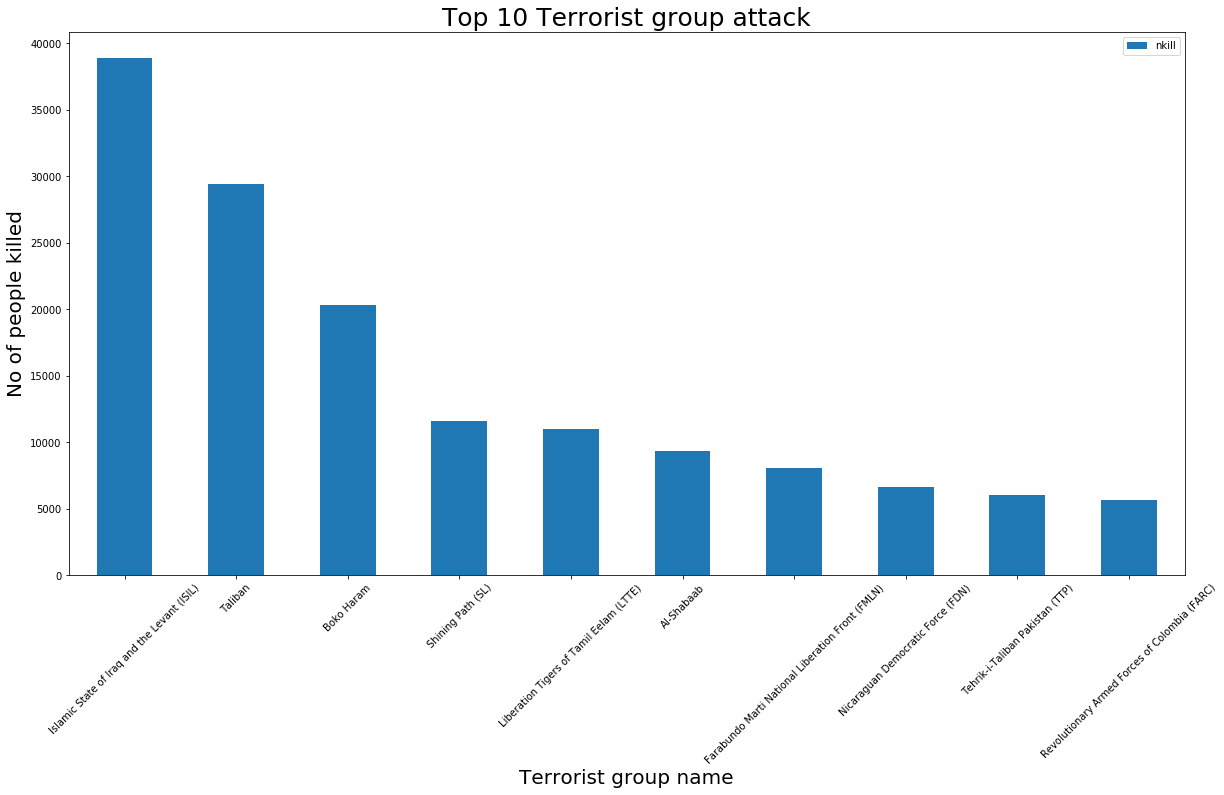

In [17]:
df[['gname','nkill']].groupby(['gname'],axis=0).sum().drop('Unknown').sort_values('nkill',ascending=False).head(10).plot(kind='bar',figsize=(20,10))
plt.title("Top 10 Terrorist group attack",fontsize=25)
plt.xlabel("Terrorist group name",fontsize=20)
plt.ylabel("No of people killed",fontsize=20)
plt.xticks(rotation = 45)
plt.show()

### Types of weapons used that caused deaths

C:\ANACONDA\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


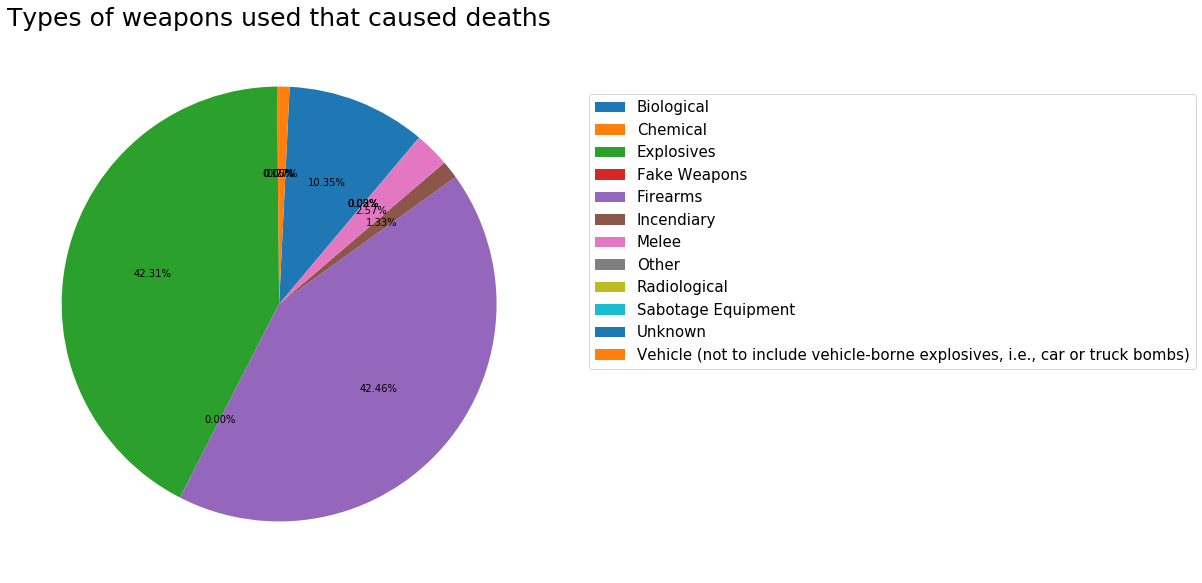

In [18]:
weapontype = df.pivot_table(columns='weaptype1_txt', values='nkill', aggfunc='sum')
weapontype

labels = weapontype.columns.tolist() # convert line to list
transpoze = weapontype.T # transpoze
values = transpoze.values.tolist()
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(aspect="equal"))
plt.pie(values, startangle=90, autopct='%.2f%%')
plt.title('Types of weapons used that caused deaths',fontsize = 25)
plt.legend(labels, loc='upper right', bbox_to_anchor = (2.2, 0.9), fontsize=15) # location legend
plt.show()

### Most Active Terrorist Organizations

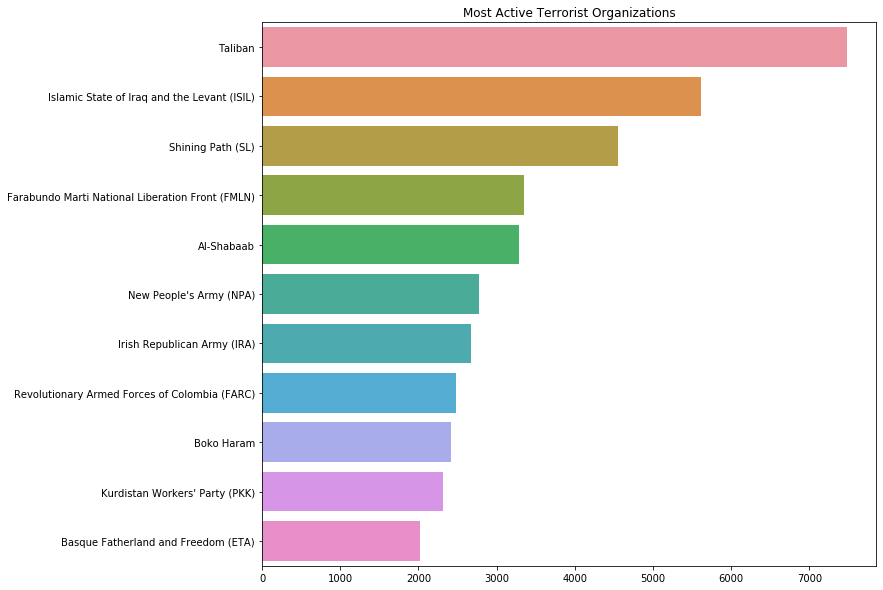

In [19]:
plt.subplots(figsize=(11,10))
sns.barplot(y=df['gname'].value_counts()[1:12].index,x=df['gname'].value_counts()[1:12].values)
plt.title('Most Active Terrorist Organizations')
plt.show()

## Conclusion

### From the above analysis and visualization the following information is concluded :

Country affected by the most terror attacks : Iraq

Regions with highest terrorist attacks : Middle East & North Africa

Mostly used weapon : Firearms and Explosives

Year with the most attacks : 2014

Group with the most attacks : Taliban

## Thank you.